In [615]:
import numpy as np

In [616]:
import pandas as pd

In [617]:
ld_train=pd.read_csv(r"C:\Users\ujjawalv\Documents\Machine-Learning-For-Predictive-Lead-Scoring-master\data\train.csv", sep=',')

In [618]:
ld_test=pd.read_csv(r"C:\Users\ujjawalv\Documents\Machine-Learning-For-Predictive-Lead-Scoring-master\data\train.csv", sep=';')

In [619]:
ld_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,25,blue-collar,single,high.school,no,yes,no,cellular,jul,mon,619,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
1,40,admin.,married,high.school,no,no,no,telephone,jun,thu,97,1,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,no
2,51,technician,married,university.degree,no,yes,no,cellular,aug,wed,512,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,yes
3,37,blue-collar,married,high.school,unknown,yes,no,cellular,jul,tue,423,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
4,54,housemaid,married,university.degree,unknown,yes,no,cellular,aug,thu,297,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no


In [620]:
ld_test["y"]=np.nan

In [621]:
ld_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 21 columns):
age               32950 non-null int64
job               32950 non-null object
marital           32950 non-null object
education         32950 non-null object
default           32950 non-null object
housing           32950 non-null object
loan              32950 non-null object
contact           32950 non-null object
month             32950 non-null object
day_of_week       32950 non-null object
duration          32950 non-null int64
campaign          32950 non-null int64
pdays             32950 non-null int64
previous          32950 non-null int64
poutcome          32950 non-null object
emp.var.rate      32950 non-null float64
cons.price.idx    32950 non-null float64
cons.conf.idx     32950 non-null float64
euribor3m         32950 non-null float64
nr.employed       32950 non-null float64
y                 32950 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [622]:
list(zip(ld_train.columns,ld_train.dtypes,ld_train.nunique()))

[('age', dtype('int64'), 78),
 ('job', dtype('O'), 12),
 ('marital', dtype('O'), 4),
 ('education', dtype('O'), 8),
 ('default', dtype('O'), 3),
 ('housing', dtype('O'), 3),
 ('loan', dtype('O'), 3),
 ('contact', dtype('O'), 2),
 ('month', dtype('O'), 10),
 ('day_of_week', dtype('O'), 5),
 ('duration', dtype('int64'), 1476),
 ('campaign', dtype('int64'), 40),
 ('pdays', dtype('int64'), 27),
 ('previous', dtype('int64'), 8),
 ('poutcome', dtype('O'), 3),
 ('emp.var.rate', dtype('float64'), 10),
 ('cons.price.idx', dtype('float64'), 26),
 ('cons.conf.idx', dtype('float64'), 26),
 ('euribor3m', dtype('float64'), 312),
 ('nr.employed', dtype('float64'), 11),
 ('y', dtype('O'), 2)]

In [623]:
import matplotlib.pyplot as plt
import seaborn as sns

In [624]:
dtypes = pd.DataFrame(ld_train.dtypes.rename('type')).reset_index().astype('str')
# Exclude duration since it is a leaky variable
dtypes = dtypes.query('index != "duration"')
numeric = dtypes[(dtypes.type.isin(['int64', 'float64'])) & (dtypes['index'] != 'duration')]['index'].values
categorical = dtypes[~(dtypes['index'].isin(numeric)) & (dtypes['index'] != 'y')]['index'].values

print('Numeric:\n', numeric)
print('Categorical:\n', categorical)

Numeric:
 ['age' 'campaign' 'pdays' 'previous' 'emp.var.rate' 'cons.price.idx'
 'cons.conf.idx' 'euribor3m' 'nr.employed']
Categorical:
 ['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome']


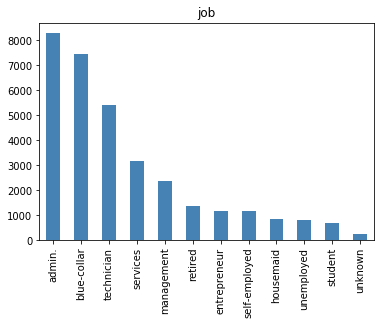

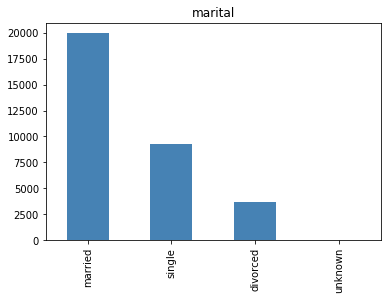

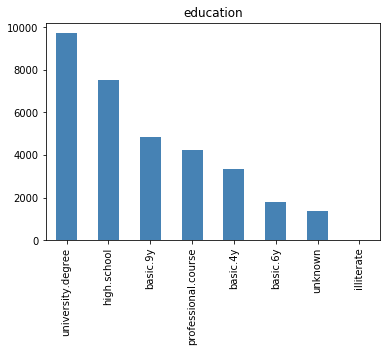

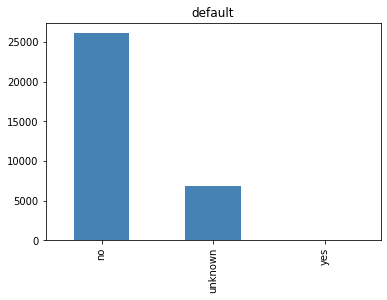

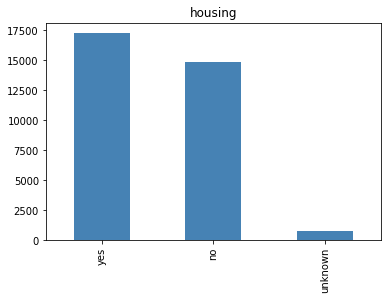

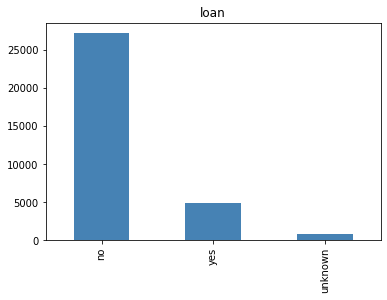

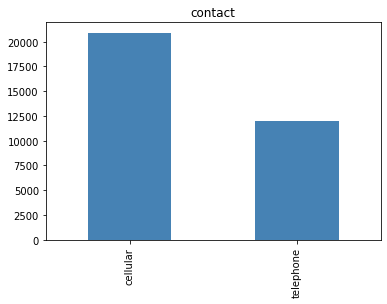

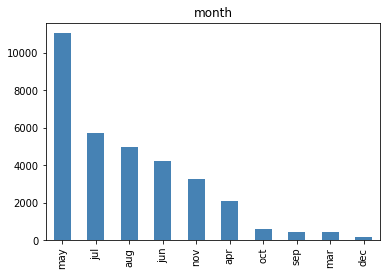

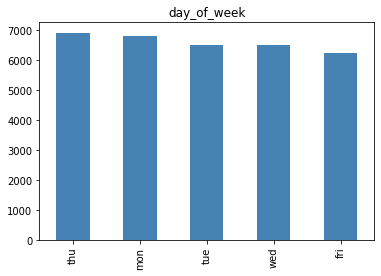

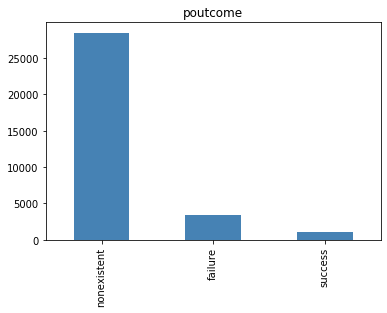

In [625]:
for attr in categorical:
  plt.figure()
  ld_train[attr].value_counts().plot(kind='bar', color='steelblue');
  plt.title(attr);

Support (job)

admin.           8279
blue-collar      7430
technician       5419
services         3155
management       2351
retired          1362
entrepreneur     1173
self-employed    1162
housemaid         861
unemployed        800
student           697
unknown           261
Name: job, dtype: int64 

Support (marital)

married     19925
single       9287
divorced     3668
unknown        70
Name: marital, dtype: int64 

Support (education)

university.degree      9722
high.school            7546
basic.9y               4860
professional.course    4234
basic.4y               3365
basic.6y               1815
unknown                1393
illiterate               15
Name: education, dtype: int64 

Support (default)

no         26089
unknown     6858
yes            3
Name: default, dtype: int64 

Support (housing)

yes        17259
no         14906
unknown      785
Name: housing, dtype: int64 

Support (loan)

no         27203
yes         4962
unknown      785
Name: loan, dtype: int64 

Sup

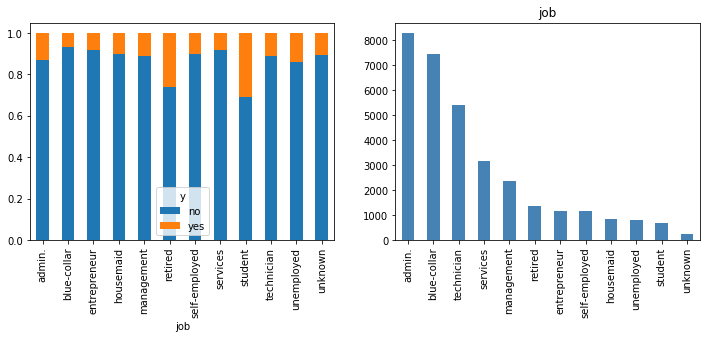

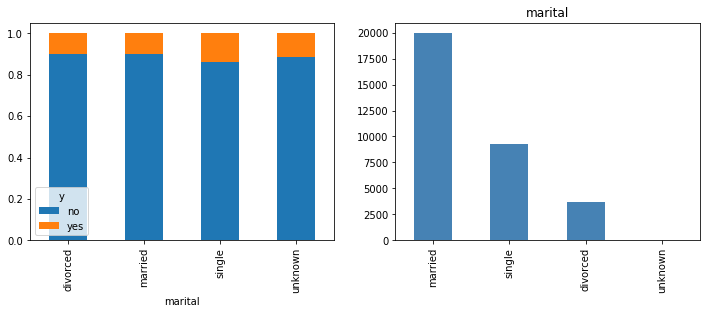

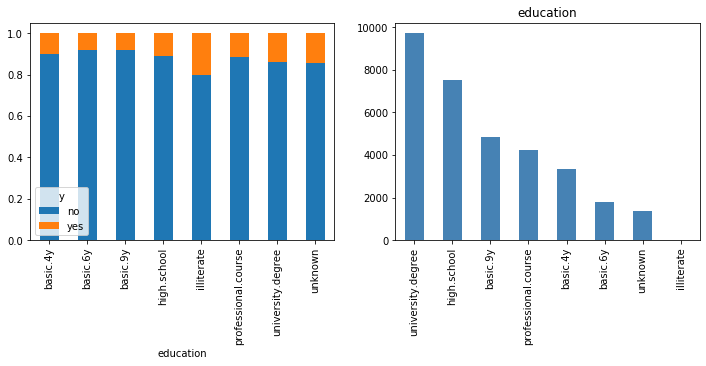

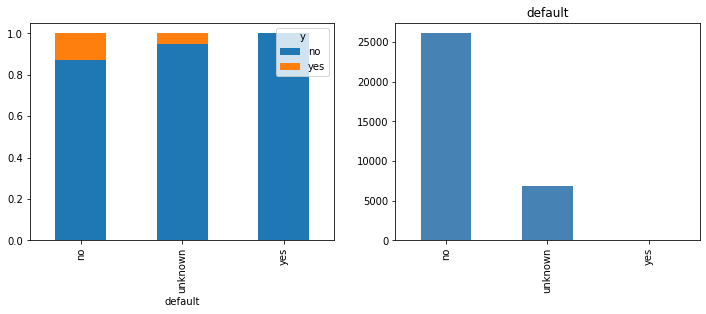

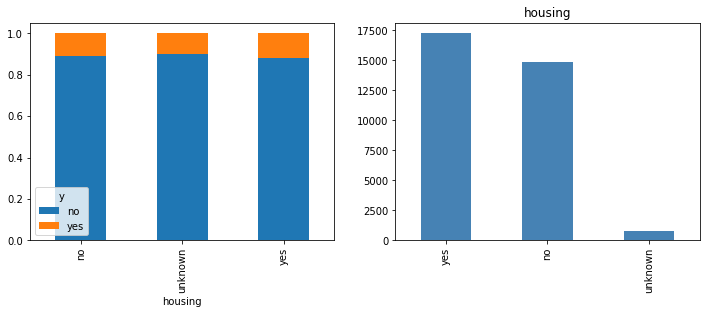

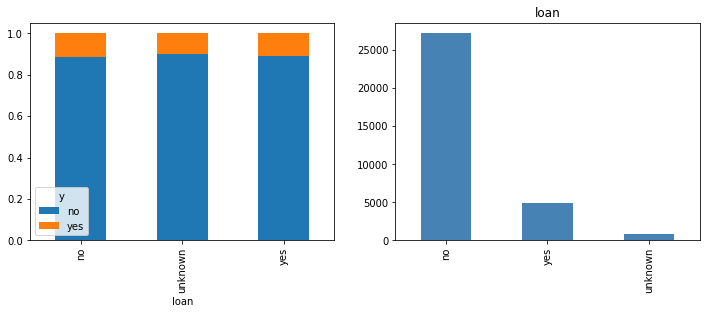

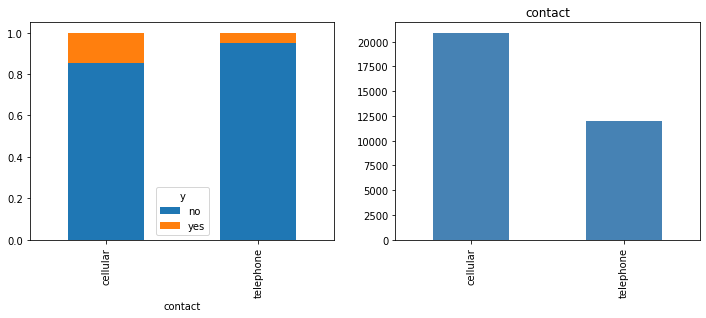

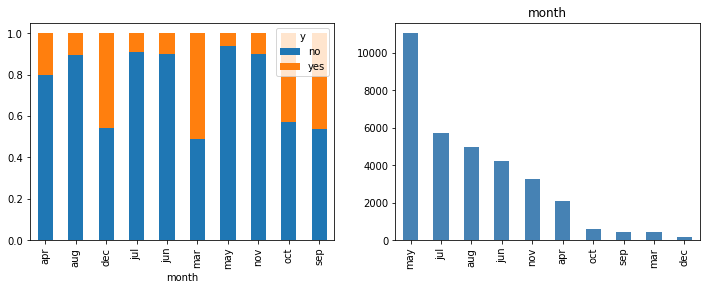

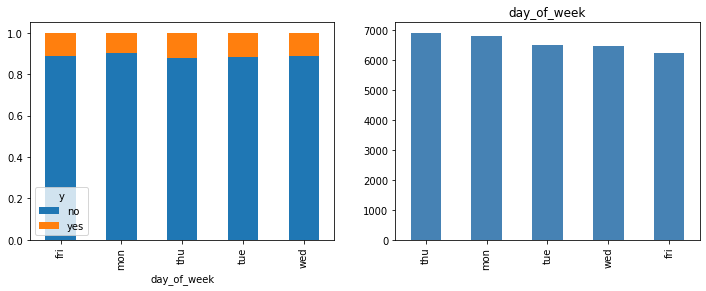

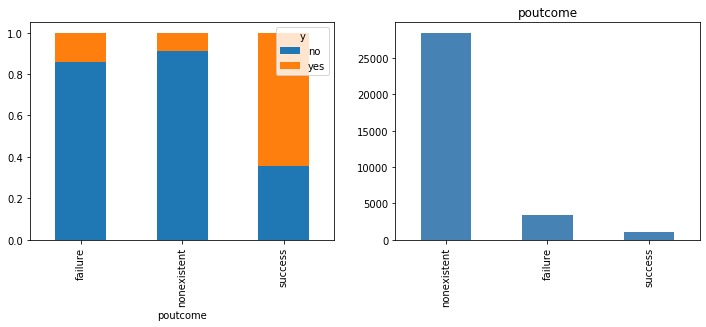

In [626]:
for attr in categorical:
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
  outcome_counts = ld_train.groupby([attr, 'y']).size().rename('count').reset_index()
  by_outcome = outcome_counts.pivot(columns='y', values='count', index=attr)
  # Plot the proportions
  by_outcome.div(by_outcome.sum(1), axis=0).plot.bar(stacked=True, ax=ax1);
  # Plot the counts
  ld_train[attr].value_counts().plot.bar(ax=ax2, legend=False,color='steelblue');
  print('Support (%s)\n' % attr)
  print(ld_train[attr].value_counts(), '\n')
  plt.title(attr);

In [627]:
#Calculate current and previous campaign success rates
poutcomes = ld_train[ld_train.poutcome != 'nonexistent'].poutcome.apply(lambda x: 1 if x == 'success' else 0)
coutcomes = ld_train.y.apply(lambda x: 1 if x == 'yes' else 0)

print('Number of records:', len(ld_train))
print('Success Rate (Current Campaign):', coutcomes.sum() / len(ld_train))
print('Success Rate (Previous Campaign):', poutcomes.sum() / len(poutcomes))

Number of records: 32950
Success Rate (Current Campaign): 0.11265553869499241
Success Rate (Previous Campaign): 0.24581005586592178


In [628]:
# coversion according to maratial status
marital_resp_rates = (ld_train.groupby('marital').y.value_counts() / ld_train.groupby('marital').size()).rename('rate').reset_index()
marital_pos_rates = marital_resp_rates.query('y == "yes"')
marital_pos_rates

,marital,y,rate
1,divorced,yes,0.101145
3,married,yes,0.101782
5,single,yes,0.140519
7,unknown,yes,0.114286


In [629]:
# conversion of that they have house or not
house_resp_rates = (ld_train.groupby('housing').y.value_counts() / ld_train.groupby('housing').size()).rename('rate').reset_index()
house_pos_rates = house_resp_rates.query('y == "yes"')
house_pos_rates

,housing,y,rate
1,no,yes,0.108480
3,unknown,yes,0.099363
5,yes,yes,0.116867


In [630]:
# conversion according to contact
contact_resp_rates = (ld_train.groupby('contact').y.value_counts() / ld_train.groupby('contact').size()).rename('rate').reset_index()
contact_pos_rates = house_resp_rates.query('y == "yes"')
contact_pos_rates

,housing,y,rate
1,no,yes,0.108480
3,unknown,yes,0.099363
5,yes,yes,0.116867


In [631]:
# conversion regarding job
job_resp_rates = (ld_train.groupby('job').y.value_counts() / ld_train.groupby('job').size()).rename('rate').reset_index()
job_pos_rates = job_resp_rates.query('y == "yes"')
job_pos_rates

,job,y,rate
1,admin.,yes,0.129363
3,blue-collar,yes,0.068237
5,entrepreneur,yes,0.083546
7,housemaid,yes,0.099884
9,management,yes,0.113143
11,retired,yes,0.262115
13,self-employed,yes,0.100688
15,services,yes,0.081458
17,student,yes,0.308465
19,technician,yes,0.109983


In [632]:
# conversion regarding education
education_resp_rates = (ld_train.groupby("education").y.value_counts() / ld_train.groupby('education').size()).rename('rate').reset_index()
education_pos_rates = education_resp_rates.query('y == "yes"')
education_pos_rates

,education,y,rate
1,basic.4y,yes,0.102229
3,basic.6y,yes,0.079339
5,basic.9y,yes,0.078807
7,high.school,yes,0.109462
9,illiterate,yes,0.200000
11,professional.course,yes,0.113604
13,university.degree,yes,0.136906
15,unknown,yes,0.143575


In [633]:
# conversion regarding taken the loan before or not
loan_resp_rates = (ld_train.groupby("loan").y.value_counts() / ld_train.groupby('loan').size()).rename('rate').reset_index()
loan_pos_rates = loan_resp_rates.query('y == "yes"')
loan_pos_rates

,loan,y,rate
1,no,yes,0.113370
3,unknown,yes,0.099363
5,yes,yes,0.110842


In [634]:
# conversion regarding on month
month_resp_rates = (ld_train.groupby("month").y.value_counts() / ld_train.groupby('month').size()).rename('rate').reset_index()
month_pos_rates = month_resp_rates.query('y == "yes"')
month_pos_rates

,month,y,rate
1,apr,yes,0.203837
3,aug,yes,0.107782
5,dec,yes,0.460526
7,jul,yes,0.091275
9,jun,yes,0.100904
10,mar,yes,0.511364
13,may,yes,0.064043
15,nov,yes,0.102203
17,oct,yes,0.427852
19,sep,yes,0.463043


In [635]:
# conversion regarding days of week
dow_resp_rates = (ld_train.groupby("day_of_week").y.value_counts() / ld_train.groupby('day_of_week').size()).rename('rate').reset_index()
dow_pos_rates = dow_resp_rates.query('y == "yes"')
dow_pos_rates

,day_of_week,y,rate
1,fri,yes,0.111681
3,mon,yes,0.099809
5,thu,yes,0.120532
7,tue,yes,0.118923
9,wed,yes,0.112413


In [636]:
# conversion regarding the putcomes
poutcome_resp_rates = (ld_train.groupby("poutcome").y.value_counts() / ld_train.groupby('poutcome').size()).rename('rate').reset_index()
poutcome_pos_rates = poutcome_resp_rates.query('y == "yes"')
poutcome_pos_rates

,poutcome,y,rate
1,failure,yes,0.142815
3,nonexistent,yes,0.088499
4,success,yes,0.645455


In [637]:
ld_train.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000534,0.003871,-0.040499,0.026070,-0.002521,-0.000826,0.131373,0.009118,-0.019976
duration,-0.000534,1.000000,-0.069824,-0.048276,0.020718,-0.028314,0.003376,-0.013826,-0.032236,-0.042909
campaign,0.003871,-0.069824,1.000000,0.053601,-0.078849,0.150863,0.126796,-0.012469,0.135417,0.144133
pdays,-0.040499,-0.048276,0.053601,1.000000,-0.591424,0.269786,0.076003,-0.090215,0.297244,0.374741
previous,0.026070,0.020718,-0.078849,-0.591424,1.000000,-0.418414,-0.201620,-0.045885,-0.452213,-0.500041
emp.var.rate,-0.002521,-0.028314,0.150863,0.269786,-0.418414,1.000000,0.776241,0.195424,0.972280,0.907165
cons.price.idx,-0.000826,0.003376,0.126796,0.076003,-0.201620,0.776241,1.000000,0.057807,0.689366,0.523400
cons.conf.idx,0.131373,-0.013826,-0.012469,-0.090215,-0.045885,0.195424,0.057807,1.000000,0.277527,0.100617
euribor3m,0.009118,-0.032236,0.135417,0.297244,-0.452213,0.972280,0.689366,0.277527,1.000000,0.945128
nr.employed,-0.019976,-0.042909,0.144133,0.374741,-0.500041,0.907165,0.523400,0.100617,0.945128,1.000000


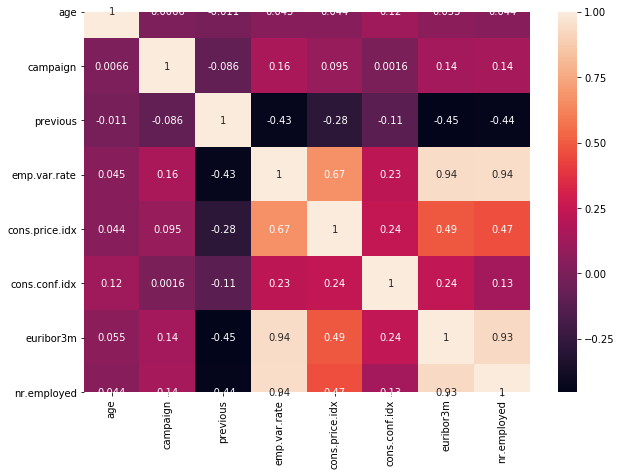

In [638]:
plt.figure(figsize=(10,7));
sns.heatmap(ld_train[numeric].drop('pdays', axis=1).corr('spearman'), annot=True);

In [639]:
ld_train['y']=(ld_train['y']=='yes').astype(int)

In [640]:
ld_train["y"].value_counts()

0    29238
1     3712
Name: y, dtype: int64

In [641]:
ld_train['pdays'].value_counts()

999    31736
3        345
6        341
4         92
2         54
9         52
7         48
12        43
10        43
5         37
13        28
1         20
11        19
15        18
8         14
0         13
14        13
16         9
17         8
18         6
19         3
21         2
22         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [642]:
ld_train["pdays"]=np.where(ld_train["pdays"]==999,0,1)

In [643]:
ld_train["pdays"]=pd.to_numeric(ld_train["pdays"],errors="coerce")

In [644]:
num_features=['age','duration']

for feature in num_features:
    x[feature]=np.log(ld_train[feature])

C:\Users\ujjawalv\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [645]:
cat_cols=ld_train.select_dtypes(['O']).columns

In [646]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [647]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [648]:
for col in cat_cols:
    freqs=ld_train[col].value_counts()
    k=freqs.index[freqs>300]
    for cat in k:
        name=col+'_'+cat
        ld_train[name]=(ld_train[col]==cat).astype(int)
    del ld_train[col]
    print(col)

job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome


In [649]:
x=ld_train.drop(["y"],axis=1)
y=ld_train["y"]

In [650]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

C:\Users\ujjawalv\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [651]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [652]:
print(model.feature_importances_)

[0.04457754 0.260014   0.03935143 0.06407142 0.00919538 0.02124797
 0.00818915 0.01223189 0.05918367 0.06589695 0.0163957  0.00965823
 0.01273599 0.00907028 0.00917326 0.0084392  0.00444604 0.00573598
 0.0042013  0.00548366 0.00568545 0.01233494 0.0138757  0.00881852
 0.01367705 0.01273272 0.0103502  0.01149594 0.0081068  0.00650411
 0.00796873 0.00640173 0.00631655 0.01332644 0.01362655 0.0011638
 0.00978521 0.00892198 0.00131767 0.00484324 0.00694245 0.01517874
 0.00499526 0.00473986 0.00421204 0.00352944 0.01094155 0.00904458
 0.00238471 0.00582937 0.01305449 0.01350611 0.01325344 0.01329188
 0.01300811 0.00554886 0.00473137 0.00925536]


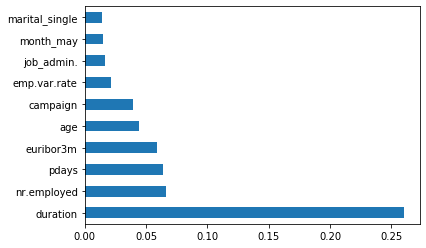

In [653]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [654]:
feat_importances.nlargest(25)

duration                         0.260014
nr.employed                      0.065897
pdays                            0.064071
euribor3m                        0.059184
age                              0.044578
campaign                         0.039351
emp.var.rate                     0.021248
job_admin.                       0.016396
month_may                        0.015179
marital_single                   0.013876
education_university.degree      0.013677
housing_no                       0.013627
day_of_week_mon                  0.013506
housing_yes                      0.013326
day_of_week_wed                  0.013292
day_of_week_tue                  0.013253
day_of_week_thu                  0.013054
day_of_week_fri                  0.013008
job_technician                   0.012736
education_high.school            0.012733
marital_married                  0.012335
cons.conf.idx                    0.012232
education_professional.course    0.011496
month_apr                        0

In [655]:
x_test=x_test[["duration","euribor3m","poutcome_success","age","campaign","nr.employed","pdays","month_may",
                 "emp.var.rate","job_admin.","marital_single","day_of_week_thu","education_high.school","housing_no","marital_married",
             "cons.conf.idx", "housing_yes","day_of_week_wed","job_technician","day_of_week_mon","education_university.degree",
              "day_of_week_tue","day_of_week_fri"]]

In [656]:
x_train=x_train[["duration","euribor3m","poutcome_success","age","campaign","nr.employed","pdays","month_may",
                 "emp.var.rate","job_admin.","marital_single","day_of_week_thu","education_high.school","housing_no","marital_married",
             "cons.conf.idx", "housing_yes","day_of_week_wed","job_technician","day_of_week_mon","education_university.degree",
              "day_of_week_tue","day_of_week_fri"]]

In [657]:
from sklearn.linear_model import LogisticRegression

In [658]:
lm= LogisticRegression()

In [659]:
lm.fit(x_train,y_train)

C:\Users\ujjawalv\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [660]:
logr=lm.predict(x_test)

In [661]:
from sklearn.metrics import roc_auc_score

In [662]:
roc_auc_score(logr,y_test)

0.7899389223684068

In [663]:
from sklearn.model_selection import RandomizedSearchCV

In [664]:
from sklearn.ensemble import RandomForestClassifier

In [665]:
clf = RandomForestClassifier()

In [666]:
param_dist = {"n_estimators":[100,200,300,500,700,1000],
              
              "bootstrap": [True, False],
              'class_weight':[None,'balanced'], 
                'criterion':['entropy','gini'],
                'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }

In [667]:
# run randomized search
n_iter_search = 50
# n_iter parameter of RandomizedSeacrhCV controls, how many 
# parameter combination will be tried; out of all possible given values

random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search,scoring='roc_auc',cv=5)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [669]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [670]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.946 (std: 0.00152)
Parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 70, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': False}

Model with rank: 2
Mean validation score: 0.946 (std: 0.00203)
Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 70, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}

Model with rank: 3
Mean validation score: 0.946 (std: 0.00168)
Parameters: {'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 15, 'max_depth': 70, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': False}

Model with rank: 4
Mean validation score: 0.945 (std: 0.00172)
Parameters: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_depth': 30, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': True}

Model with rank: 5
Mean validation score: 0.945 (std: 0.00109)
Parameters: {'n_

In [681]:
rf=random_search.best_estimator_

In [682]:
logr=rf.fit(x_train, y_train)

In [683]:
logr=rf.predict(x_test)

In [684]:
roc_auc_score(logr,y_test)

0.7851428383851088

In [685]:
from xgboost.sklearn import XGBClassifier

In [687]:
xgb_params = {  
                "learning_rate":[0.01,0.05,0.1,0.3,0.5],
                "gamma":[i/10.0 for i in range(0,5)],
                "max_depth": [2,3,4,5,6,7,8],
                "min_child_weight":[1,2,5,10],
                "max_delta_step":[0,1,2,5,10],
                "subsample":[i/10.0 for i in range(5,10)],
                "colsample_bytree":[i/10.0 for i in range(5,10)],
                "colsample_bylevel":[i/10.0 for i in range(5,10)],
                "reg_lambda":[1e-5, 1e-2, 0.1, 1, 100], 
                "reg_alpha":[1e-5, 1e-2, 0.1, 1, 100],
                "scale_pos_weight":[1,2,3,4,5,6,7,8,9],
                "n_estimators":[100,500,700,1000]
             }

In [688]:
xgb=XGBClassifier(objective='binary:logistic')

In [689]:
n_iter=50

random_search=RandomizedSearchCV(xgb,n_jobs=-1,cv=5,n_iter=n_iter,scoring='roc_auc',
                                 param_distributions=xgb_params)

In [690]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_co...
                                        'max_delta_step': [0, 1, 2, 5, 10],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'min_child_weight': [1, 2, 5, 10

In [694]:
logr=random_search.predict(x_test)

In [695]:
roc_auc_score(logr,y_test)

0.7388109964191945

In [698]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim =x_train.shape[1]))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(x_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)


C:\Users\ujjawalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=23, units=6, kernel_initializer="he_uniform")`
C:\Users\ujjawalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
C:\Users\ujjawalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
C:\Users\ujjawalv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 15453 samples, validate on 7612 samples
Epoch 1/100
15453/15453 [==============================] - 39s 3ms/step - loss: 0.3697 - acc: 0.8682 - val_loss: 0.2830 - val_acc: 0.8966
Epoch 2/100
15453/15453 [==============================] - 38s 2ms/step - loss: 0.2513 - acc: 0.9012 - val_loss: 0.2377 - val_acc: 0.8994
Epoch 3/100
15453/15453 [==============================] - 42s 3ms/step - loss: 0.2206 - acc: 0.9042 - val_loss: 0.2143 - val_acc: 0.9019
Epoch 4/100
15453/15453 [==============================] - 39s 3ms/step - loss: 0.2063 - acc: 0.9069 - val_loss: 0.2043 - val_acc: 0.9040
Epoch 5/100
15453/15453 [==============================] - 39s 3ms/step - loss: 0.2003 - acc: 0.9081 - val_loss: 0.1996 - val_acc: 0.9033
Epoch 6/100
15453/15453 [==============================] - 38s 2ms/step - loss: 0.1974 - acc: 0.9093 - val_loss: 0.1972 - val_acc: 0.9041
Epoch 7/100
15453/15453 [==============================] - 39s 2ms/step - loss: 0.1953 - acc: 0.9093 - val_loss: 0.1966 - v

15453/15453 [==============================] - 38s 2ms/step - loss: 0.1827 - acc: 0.9153 - val_loss: 0.1913 - val_acc: 0.9091
Epoch 60/100
15453/15453 [==============================] - 35s 2ms/step - loss: 0.1824 - acc: 0.9156 - val_loss: 0.1916 - val_acc: 0.9080
Epoch 61/100
15453/15453 [==============================] - 37s 2ms/step - loss: 0.1825 - acc: 0.9154 - val_loss: 0.1920 - val_acc: 0.9086
Epoch 62/100
15453/15453 [==============================] - 36s 2ms/step - loss: 0.1823 - acc: 0.9156 - val_loss: 0.1916 - val_acc: 0.9086
Epoch 63/100
15453/15453 [==============================] - 35s 2ms/step - loss: 0.1822 - acc: 0.9159 - val_loss: 0.1923 - val_acc: 0.9087
Epoch 64/100
15453/15453 [==============================] - 38s 2ms/step - loss: 0.1821 - acc: 0.9156 - val_loss: 0.1918 - val_acc: 0.9074
Epoch 65/100
15453/15453 [==============================] - 39s 3ms/step - loss: 0.1821 - acc: 0.9159 - val_loss: 0.1917 - val_acc: 0.9070
Epoch 66/100
15453/15453 [==============

In [700]:
classifier.predict(x_test)

array([[1.45582331e-03],
       [1.15621805e-01],
       [9.86363040e-04],
       ...,
       [1.13411009e-01],
       [1.01187390e-04],
       [2.82743156e-01]], dtype=float32)

In [701]:
roc_auc_score(logr,y_test)

0.7388109964191945